In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import warnings
import seaborn as sns
import statsmodels.api as sm
from scipy import stats, polyval   # 수학공식 선형회귀분석

matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams["font.size"] = 14               
matplotlib.rcParams['axes.unicode_minus']=False
warnings.simplefilter('ignore')

In [25]:
titanic=sns.load_dataset('titanic')

In [ ]:
# survival (0:No), Pcclass(1:1st,2:2nd,3:3rd),sibsp(동승자),parch(직계가족)
# 1.deck 컴럼을 삭제하고 나이(age)의 nan 데이터를 삭제 하시요
# 2.생존자와 사망자에 대한 갯수를 구하시요
# 3.등급별(pclass) 평균 생존률을 구하시요
# 4. SibSp(가족과탑승) 의 평균 생존율을 구하시요
# 5. 등급별 티켓비용(fare) 의 평균 차트로 그리시요
# 6. 혼자탑승(alone)한 인원의 평균 생존율을 구하시요
# 7.성별 평균 생존율을 구하시요 
# 8.나이분류 컬럼을 추가하시요 
# 9.1~15(미성년자), 15~25(청년), 25~35(중년), 
#   35~60(장년), 60~(노년)  으로 표시하시요.
# 10. 나이분류를 파이차트로 표시하시요
# 11. 생존율이 가장 높은 나이분류를 구하시요
# 12. 성별, 나이분류별, 등급(pclass)를 멀티인덱스로, 생존률을 값으로 표시하시요

In [26]:
# 1.deck 컴럼을 삭제하고 나이(age)의 nan 데이터를 삭제 하시오.
titanic.drop('deck',axis=1,inplace=True)

In [34]:
titanic.dropna(subset=['age'], inplace=True)
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [70]:
# 2.생존자와 사망자에 대한 갯수를 구하시요
titanic.head()
print("생존자수 : %d 명"%titanic['survived'].value_counts()[1])
print("사망자수 : %d 명"%titanic['survived'].value_counts()[0])

생존자수 : 290 명
사망자수 : 424 명


In [59]:
# 3.등급별(pclass) 평균 생존률을 구하시요
titanic.head()
pd.options.display.float_format='{:.2f}'.format
(titanic.groupby('pclass').mean()*100)['survived']

pclass
1   65.59
2   47.98
3   23.94
Name: survived, dtype: float64

In [61]:
# 4. SibSp(가족과탑승) 의 평균 생존율을 구하시요
titanic.head()
(titanic.groupby('sibsp').mean()*100)['survived']

sibsp
0   37.15
1   53.01
2   44.00
3   33.33
4   16.67
5    0.00
Name: survived, dtype: float64

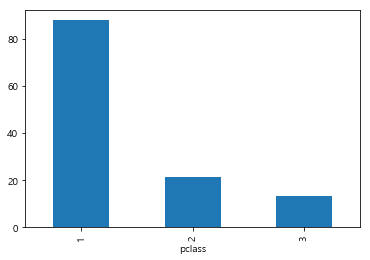

In [62]:
# 5. 등급별 티켓비용(fare) 의 평균 차트로 그리시요
(titanic.groupby('pclass').mean())['fare'].plot(kind='bar')
plt.show()

In [72]:
titanic.head()
# 6. 혼자탑승(alone)한 인원의 평균 생존율을 구하시요
(titanic.groupby('sibsp').mean()*100)['survived'][0]

37.15498938428875

In [74]:
# 7.성별 평균 생존율을 구하시요 
(titanic.groupby('sex').mean())['survived']*100

sex
female   75.48
male     20.53
Name: survived, dtype: float64

In [79]:
# 8.나이분류 컬럼을 추가하시요
titanic['나이분류']=np.NaN
titanic.head()

survived  pclass     sex   age  sibsp  parch  fare embarked  class    who  \
0         0       3    male 22.00      1      0  7.25        S  Third    man   
1         1       1  female 38.00      1      0 71.28        C  First  woman   
2         1       3  female 26.00      0      0  7.92        S  Third  woman   
3         1       1  female 35.00      1      0 53.10        S  First  woman   
4         0       3    male 35.00      0      0  8.05        S  Third    man   

   adult_male  embark_town alive  alone  나이분류  
0        True  Southampton    no  False   nan  
1       False    Cherbourg   yes  False   nan  
2       False  Southampton   yes   True   nan  
3       False  Southampton   yes  False   nan  
4        True  Southampton    no   True   nan

In [182]:
# 9.1~15(미성년자), 15~25(청년), 25~35(중년), 35~60(장년), 60~(노년)으로 표시하시요.

def fn(v):
    if 1<=v<=15:
        A='미성년자'
    elif 15<v<=25:
        A='청년'
    elif 25<v<=35:
        A='중년'
    elif 35<v<=60:
        A='장년'
    else:
        A='노년'
    return A

def fn1(v):
    if 1<=v<=15:
        b=1
    elif 15<v<=25:
        b=2
    elif 25<v<=35:
        b=3
    elif 35<v<=60:
        b=4
    else:
        b=5
    return int(b)

ageClass=[]
age_mod=[]
for n in titanic['age']:
    ageClass.append(fn(n))
    age_mod.append(fn1(n))
    
titanic['나이분류']=ageClass
titanic.head()

survived  pclass     sex   age  sibsp  parch  fare embarked  class    who  \
0         0       3    male 22.00      1      0  7.25        S  Third    man   
1         1       1  female 38.00      1      0 71.28        C  First  woman   
2         1       3  female 26.00      0      0  7.92        S  Third  woman   
3         1       1  female 35.00      1      0 53.10        S  First  woman   
4         0       3    male 35.00      0      0  8.05        S  Third    man   

   adult_male  embark_town alive  alone 나이분류  
0        True  Southampton    no  False   청년  
1       False    Cherbourg   yes  False   장년  
2       False  Southampton   yes   True   중년  
3       False  Southampton   yes  False   중년  
4        True  Southampton    no   True   중년

In [177]:
# 10. 나이분류를 파이차트로 표시하시요
xname=[1,2,3,4,5]
plt.figure(figsize=[6,6])
plt.pie(age_mod, labels=xname, autopct='%.1f %%', shadow=True)
plt.show()

<Figure size 432x432 with 0 Axes>

In [183]:
# 11. 생존율이 가장 높은 나이 분류를 구하시요
(titanic.groupby('나이분류').mean())['survived']*100
# ((titanic.groupby('나이분류').mean())['survived']*100).max()

나이분류
노년     41.38
미성년자   55.26
장년     40.00
중년     42.35
청년     34.40
Name: survived, dtype: float64